In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
board_data.h5
ghgp_data_by_year_8_5_17.xlsx*
tickers.csv
tickers.xlsx*
us_emissions.h5


In [3]:
board_data = pd.read_hdf('../data/board_data.h5', 'board_data')
us_emissions = pd.read_hdf('../data/us_emissions.h5', 'us_emissions')

In [4]:
board_data.head()

,Company,2020 Rating,Total Board,# of women,% of Women,Sector,State,City,Company_clean
0,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL,3m
1,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK,abbott laboratories
2,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE,adobe systems
3,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS,aflac
4,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN,air products chemicals


In [5]:
us_emissions.head()

,Company,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US,3m
2,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US,abbott laboratories
6,"Adobe Systems, Inc.",USA,97.0,A,2744.0,22995.0,ADBE US,adobe systems
8,AFLAC Incorporated,USA,85.0,B,3884.0,18536.0,AFL US,aflac
11,"Air Products & Chemicals, Inc.",USA,99.0,B,14767209.0,10563030.0,APD US,air products chemicals


In [6]:
joined_df = pd.merge(us_emissions, board_data, on='Company_clean')

In [7]:
joined_df.head()

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
0,3M Company,USA,70.0,D,4540000.0,2230000.0,MMM US,3m,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL
1,Abbott Laboratories,USA,84.0,B,470781.0,537821.0,ABT US,abbott laboratories,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK
2,"Adobe Systems, Inc.",USA,97.0,A,2744.0,22995.0,ADBE US,adobe systems,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE
3,AFLAC Incorporated,USA,85.0,B,3884.0,18536.0,AFL US,aflac,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS
4,"Air Products & Chemicals, Inc.",USA,99.0,B,14767209.0,10563030.0,APD US,air products chemicals,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN


In [8]:
joined_df = joined_df.sort_values(by='% of Women', ascending=True)

In [9]:
joined_df['% of Women'] = joined_df['% of Women'].apply(lambda x : int(re.sub('%', '', x)))

In [10]:
joined_df.head()

,Company_x,Country,Disclosure Score,Performance Band,Scope 1,Scope 2,Ticker Symbol,Company_clean,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
67,"Noble Energy, Inc.",USA,76.0,C,2078600.00,61630.00,NBL US,noble energy,NOBLE ENERGY INC,NaN,10,1,10,Energy,Texas,HOUSTON
76,"Praxair, Inc.",USA,98.0,B,5355000.00,11329000.00,PX US,praxair,PRAXAIR INC,NaN,9,1,11,Basic Materials,Connecticut,DANBURY
49,HCP Inc.,USA,97.0,A-,28940.00,216887.00,HCP US,hcp,HCP INC.,NaN,8,1,13,Real Estate,California,IRVINE
64,Morgan Stanley,USA,96.0,A,13757.46,330746.62,MS US,morgan stanley,MORGAN STANLEY,NaN,14,2,14,Financial Services,New York,NEW YORK
35,Dow Chemical Company,USA,90.0,B,27429000.00,8403000.00,DOW US,dow chemical,DOW CHEMICAL CO /DE/,NaN,13,2,15,Basic Materials,Michigan,MIDLAND


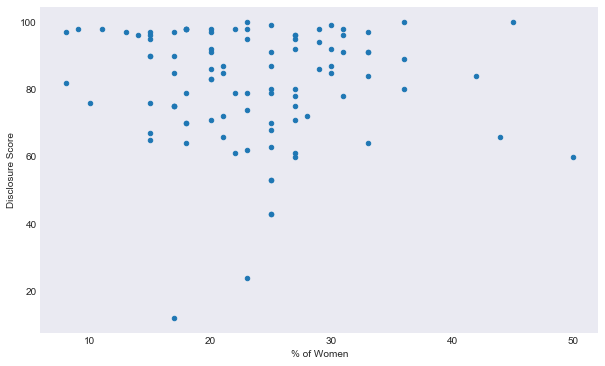

In [11]:
f, ax = plt.subplots()
joined_df.plot.scatter(x='% of Women', y='Disclosure Score', ax=ax);

In [12]:
joined_df.shape

(98, 16)

In [13]:
avg = joined_df.groupby('Sector').mean().sort_values('% of Women')

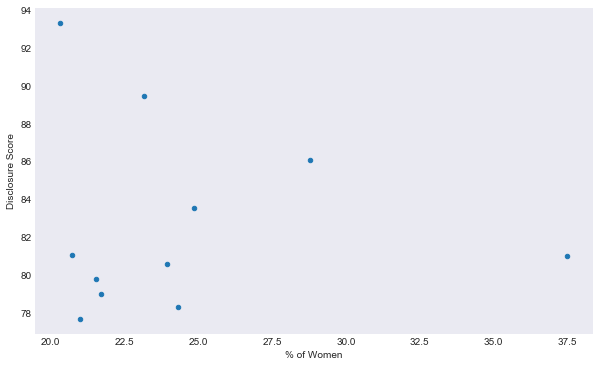

In [14]:
f, ax = plt.subplots()
avg.plot.scatter(x='% of Women', y='Disclosure Score', ax=ax);

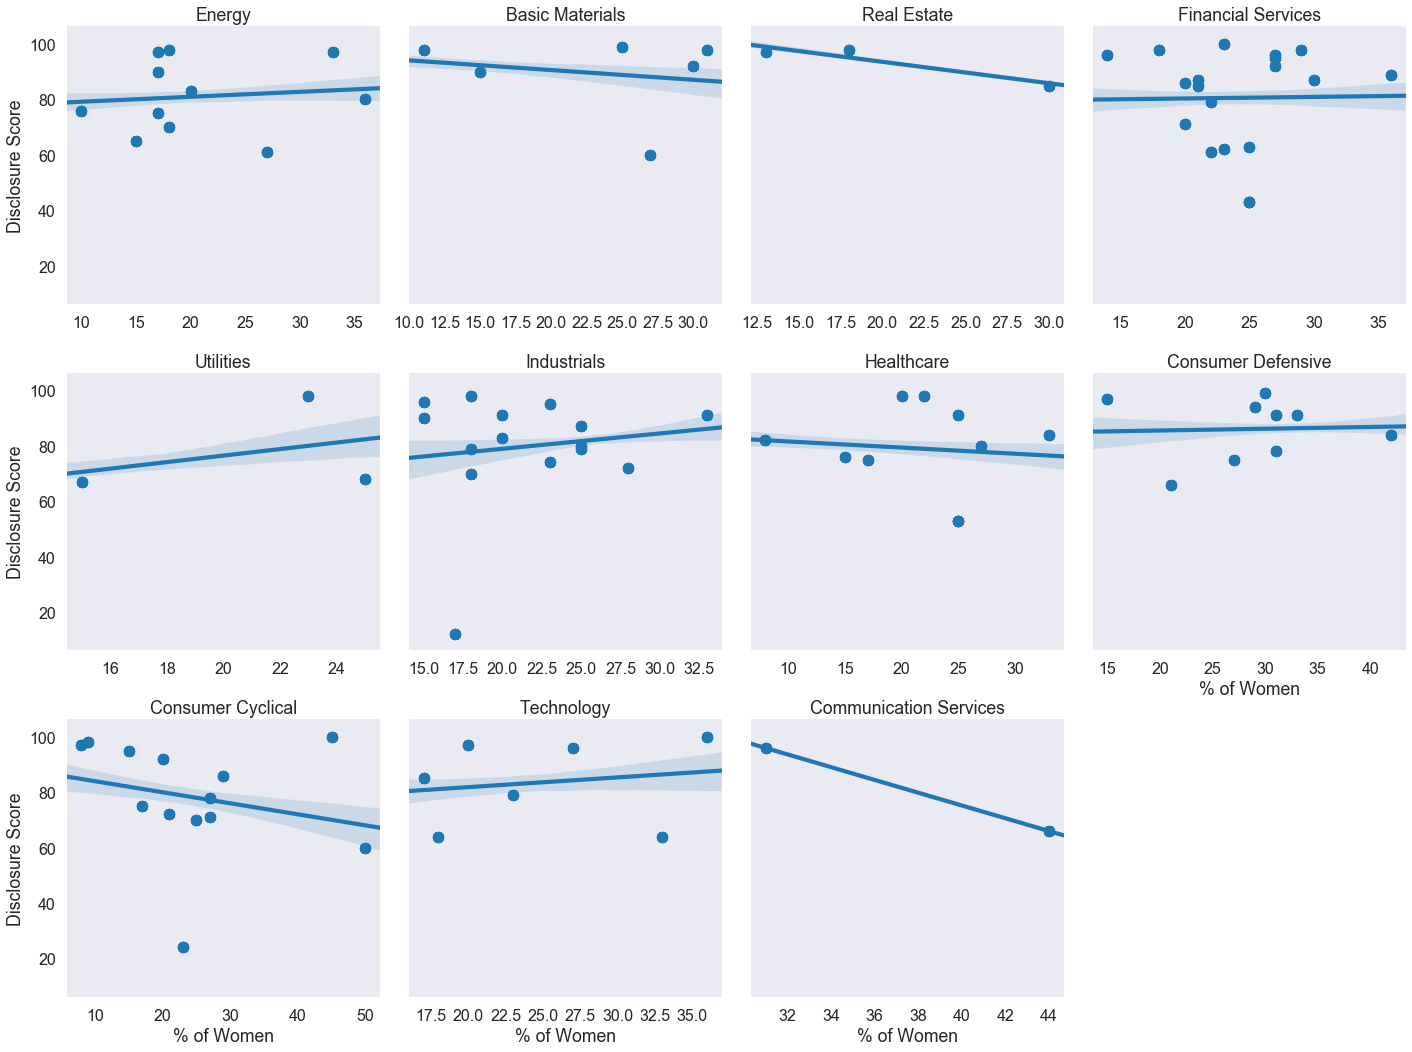

In [18]:
joined_melted = joined_df.melt(["Company_clean", "% of Women", 'Sector', 'Disclosure Score'])
with sns.plotting_context("poster"):    
    g = sns.lmplot(data=joined_melted, x="% of Women", y="Disclosure Score", 
                  col="Sector", col_wrap=4, scatter_kws={"alpha":.5},
                  sharex=False)
    g.set_titles("{col_name}");